## **Jan 選擇權資料**

In [63]:
import os
import pandas as pd
from tqdm import tqdm

df = pd.DataFrame()

# 讀每年一月的檔案
dir_name = 'D:\\碩論資料\\TABLE_year_January'
files = os.listdir(dir_name)
for index, file in enumerate(tqdm(files)):
    if index == 14:  # 2013無法讀檔
        continue
        
    file_path = os.path.join(dir_name, file)
    df_ori = pd.read_csv(file_path)

    df = df.append(df_ori)  # 存成 'total.csv'



100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [07:55<00:00, 25.02s/it]


In [66]:
df2 = df.drop_duplicates(['secid','ticker','cusip'])  # 取單一對照，存成 'uni_total.csv'
#df2.to_csv('uni_total.csv')

In [68]:
df2

,cp_flag,cusip,date,exdate,exercise_style,index_flag,issuer,optionid,secid,symbol,ticker
0,P,00190710,19960104,19960120,A,0,AST RESEARCH INC,10002894,5005,NaN,ASTA
482,P,00867710,19960104,19960120,A,0,AHMANSON (H F) & CO,10084818,5015,NaN,AHM
976,C,01447610,19960104,19960518,A,0,ALEXANDER & ALEXANDER,10210717,5022,NaN,AAL
1420,C,02209210,19960104,19960120,A,0,ALTRON INC,10322435,5028,NaN,ALRN
1897,P,02390510,19960104,19960518,A,0,AMDAHL CORP,10010891,5029,NaN,AMH
...,...,...,...,...,...,...,...,...,...,...,...
16835524,C,43283X10,20170105,20170120,A,0,HILTON GRAND VACATIONS INC,114394323,210641,NaN,HGV
16836026,C,70051710,20170105,20170120,A,0,PARK HOTELS RESORTS INC,114403992,210643,NaN,PK
16836580,C,89686D10,20170105,20170120,A,0,TRIVAGO N V,114411217,210685,NaN,TRVG
16837040,C,G8711010,20170117,20170120,A,0,TECHNIPFMC PLC,114479480,210772,NaN,FTI


### *查詢對應的secid*

In [221]:
# 查詢資訊，ticker未必存在，可透過 'issuer' 反查
for firm in df2['issuer']:
    if 'Atmel'.upper() in firm:
        print(firm)


ATMEL CORP


In [281]:
# 查詢資訊
df2[df2['secid'] == 124127]

,cp_flag,cusip,date,exdate,exercise_style,index_flag,issuer,optionid,secid,symbol,ticker
3668804,C,82706C10,20070111,20070120,A,0,SILICON MOTION TECHNOLOGY CO,32357023,124127,NaN,SIMO


In [282]:
# 查詢資訊
df[df['issuer'] == 'SILICON MOTION TECHNOLOGY CO']

,cp_flag,cusip,date,exdate,exercise_style,index_flag,issuer,optionid,secid,symbol,ticker
3668804,C,82706C10,20070111,20070120,A,0,SILICON MOTION TECHNOLOGY CO,32357023,124127,NaN,SIMO
3668805,C,82706C10,20070111,20070120,A,0,SILICON MOTION TECHNOLOGY CO,32357021,124127,NaN,SIMO
3668806,C,82706C10,20070111,20070120,A,0,SILICON MOTION TECHNOLOGY CO,32357020,124127,NaN,SIMO
3668807,C,82706C10,20070111,20070217,A,0,SILICON MOTION TECHNOLOGY CO,32357026,124127,NaN,SIMO
3668808,C,82706C10,20070111,20070217,A,0,SILICON MOTION TECHNOLOGY CO,32357016,124127,NaN,SIMO
...,...,...,...,...,...,...,...,...,...,...,...
10414657,P,82706C10,20170131,20170915,A,0,SILICON MOTION TECHNOLOGY CO,114605247,124127,NaN,SIMO
10414658,P,82706C10,20170131,20170915,A,0,SILICON MOTION TECHNOLOGY CO,114605248,124127,NaN,SIMO
10414659,P,82706C10,20170131,20170915,A,0,SILICON MOTION TECHNOLOGY CO,114605249,124127,NaN,SIMO
10414660,P,82706C10,20170131,20170915,A,0,SILICON MOTION TECHNOLOGY CO,114605250,124127,NaN,SIMO


### *確認 secid 和 ticker 的對應關係*

In [72]:
import numpy as np

def count_unique(series):
    return len(pd.unique(series))


# 在特定一天，某個ticker有多少個不同個secid
dff = pd.pivot_table(df, values='secid', index=['date'], columns=['ticker'], aggfunc=count_unique)

In [73]:
dff

ticker,?,A,AA,AABA,AAC,AAI,AAIIQ,AAL,AAN,AAOI,...,ZZZZA,ZZZZB,ZZZZD,ZZZZE,ZZZZF,ZZZZK,ZZZZQ,ZZZZS,ZZZZY,ZZZZZ
date,,,,,,,,,,,,,,,,,,,,,
19960104,6.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,...,2.0,NaN,NaN,6.0,1.0,1.0,31.0,1.0,2.0,1.0
19960105,6.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,...,2.0,NaN,NaN,6.0,1.0,1.0,31.0,1.0,2.0,1.0
19960108,6.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,...,2.0,NaN,NaN,6.0,1.0,1.0,31.0,1.0,2.0,1.0
19960109,6.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,...,2.0,NaN,NaN,6.0,1.0,1.0,31.0,1.0,2.0,1.0
19960110,6.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,...,2.0,NaN,NaN,6.0,1.0,1.0,31.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20170125,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20170126,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20170127,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# secid數量有異常的 tickers
dff[[col for col in dff.columns if (dff[col] != [1.0]*len(dff)).any()]].head()

ticker,?,A,AA,AABA,AAC,AAI,AAIIQ,AAL,AAN,AAOI,...,ZZZZA,ZZZZB,ZZZZD,ZZZZE,ZZZZF,ZZZZK,ZZZZQ,ZZZZS,ZZZZY,ZZZZZ
date,,,,,,,,,,,,,,,,,,,,,
19960104,6.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,...,2.0,NaN,NaN,6.0,1.0,1.0,31.0,1.0,2.0,1.0
19960105,6.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,...,2.0,NaN,NaN,6.0,1.0,1.0,31.0,1.0,2.0,1.0
19960108,6.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,...,2.0,NaN,NaN,6.0,1.0,1.0,31.0,1.0,2.0,1.0
19960109,6.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,...,2.0,NaN,NaN,6.0,1.0,1.0,31.0,1.0,2.0,1.0
19960110,6.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,...,2.0,NaN,NaN,6.0,1.0,1.0,31.0,1.0,2.0,1.0


## **63家半導體對應的secid**

### *skip*

In [75]:
semi = pd.read_excel('C:\\Users\\User\\Desktop\\資料整理\\半導體_國泰.xlsx')
tickers_all = semi.Ticker.values.tolist()  # 63 家半導體

In [53]:
# 確認某天某ticker出現過的secid or cusip
df[(df['date']==20000103) & (df['ticker']=='ADI')]['secid'].unique()

array([101535], dtype=int64)

In [76]:
non_exist = []
err = []
for i, ticker in enumerate(tickers_all):
    try:
        dff[ticker]
        if (dff[ticker] == [1.0]*len(dff)).any():
            print('第{}個ticker:{} 資料完整'.format(i, ticker))
        else:
            print('第{}個ticker:{} 資料有異，df如下：'.format(i, ticker))
            print(dff[ticker])
            err.append(ticker)
    except:
        print('{}不存在'.format(ticker))
        non_exist.append(ticker)

第0個ticker:ADI 資料完整
ALTR不存在
第2個ticker:AMAT 資料完整
第3個ticker:AMD 資料完整
ARMH不存在
第5個ticker:ASML 資料完整
ATHR不存在
ATML不存在
第8個ticker:AVGO 資料完整
BRCM不存在
第10個ticker:BRKS 資料完整
第11個ticker:CAVM 資料完整
第12個ticker:CCMP 資料完整
第13個ticker:CREE 資料完整
第14個ticker:CRUS 資料完整
CY不存在
第16個ticker:ENTG 資料完整
第17個ticker:FSL 資料有異，df如下：
date
19960104   NaN
19960105   NaN
19960108   NaN
19960109   NaN
19960110   NaN
            ..
20170125   NaN
20170126   NaN
20170127   NaN
20170130   NaN
20170131   NaN
Name: FSL, Length: 362, dtype: float64
HITT不存在
第19個ticker:IDCC 資料完整
IDTI不存在
IFNNY不存在
第22個ticker:INFN 資料完整
第23個ticker:INTC 資料完整
第24個ticker:IPHI 資料完整
第25個ticker:KLAC 資料完整
LLTC不存在
第27個ticker:LRCX 資料完整
第28個ticker:LSCC 資料完整
第29個ticker:LSI 資料完整
第30個ticker:MCHP 資料完整
第31個ticker:MKSI 資料完整
MLNX不存在
第33個ticker:MPWR 資料完整
第34個ticker:MRVL 資料完整
第35個ticker:MSCC 資料完整
第36個ticker:MSI 資料完整
第37個ticker:MU 資料完整
第38個ticker:MXIM 資料完整
NETL不存在
第40個ticker:NSM 資料完整
第41個ticker:NVDA 資料完整
NVLS不存在
第43個ticker:NXPI 資料完整
第44個ticker:ON 資料完整
第45個ticker:POWI 資料完整
第46個

In [77]:
len(non_exist)

17

In [78]:
exist = [ticker for ticker in tickers_all if (ticker not in non_exist) & (ticker not in err)]

In [80]:
ticker_secid = {}

for ticker in exist:
    ticker_secid[ticker] = df[df['ticker']==ticker]['secid'].unique()[0]

In [91]:
ticker_secid_df = pd.DataFrame({'secid':ticker_secid})

In [93]:
# 對應到的secid存檔
tmp = ticker_secid_df.T
tmp['FSL'] = '121717&122434'
tmp.T.to_csv('ticker_secid_exist.csv')

In [111]:
# 查詢 63 家半導體的 secid
a = pd.DataFrame()
for ticker in tickers:
    a = a.append(df2[df2['ticker'] == ticker])

a

,cp_flag,cusip,date,exdate,exercise_style,index_flag,issuer,optionid,secid,symbol,ticker
358166,C,03265410,19960104,19960622,A,0,ANALOG DEVICES INC,10016089,101535,NaN,ADI
367000,P,03822210,19960104,19960720,A,0,APPLIED MATLS INC,10081801,101610,NaN,AMAT
306077,P,00790310,19960104,19960120,A,0,ADVANCED MICRO DEVICES INC,10058995,101121,NaN,AMD
2703740,C,N0705921,20000103,20000422,A,0,ASML HOLDING N V,10021632,112435,098EB.00,ASML
5510921,C,11135F10,20100104,20100116,A,0,BROADCOM INC,44995634,139322,NaN,AVGO
569108,P,11434010,20000103,20000122,A,0,BROOKS AUTOMATION INC,10056344,102373,09972.98,BRKS
5537389,C,14964U10,20080102,20080119,A,0,CAVIUM INC,32993856,129430,NaN,CAVM
627140,C,12709P10,20010102,20010120,A,0,CABOT MICROELECTRONICS CORP,11846238,102596,NaN,CCMP
515379,C,22544710,19960104,19960622,A,0,CREE INC,10105302,103517,NaN,CREE
476517,C,17275510,19960104,19960217,A,0,CIRRUS LOGIC INC,10081105,103041,NaN,CRUS


### *確認選擇權 ovsv&skew 的 secid*

In [202]:
semi_61 = pd.read_excel('C:\\Users\\User\\Desktop\\資料整理\\semi_61.xlsx')
secids_all = semi_61.secid.values.tolist()  # 61 家半導體

In [54]:
df_v = pd.read_csv('weeklyovsv.csv')
df_p = pd.read_csv('weeklyskew.csv')

# 轉換為日期較方便
df_v['date'] = pd.to_datetime([str(date)[:4]+'-'+str(date)[4:6]+'-'+str(date)[6:] for date in df_v['date']])
df_p['date'] = pd.to_datetime([str(date)[:4]+'-'+str(date)[4:6]+'-'+str(date)[6:] for date in df_p['date']])

In [260]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9417754 entries, 0 to 9417753
Data columns (total 5 columns):
Unnamed: 0    int64
skewcount     int64
secid         int64
weeklyskew    float64
date          datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 359.3 MB


In [262]:
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13182265 entries, 0 to 13182264
Data columns (total 9 columns):
Unnamed: 0        int64
weeklycallvol     float64
secid             int64
weeklyputvol      float64
weeklycallnum     float64
weeklyputnum      float64
weeklystockvol    float64
date              datetime64[ns]
weeklyvol         float64
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 905.2 MB


In [217]:
for secid in secids_all:
    tmp = df_v[df_v['secid'] == int(secid)]
    print('secid:{}, length:{}'.format(secid, len(tmp)))

secid:101535, length:7786
secid:101293, length:7220
secid:101610, length:8022
secid:101121, length:7923
secid:112435, length:0
secid:120446, length:2120
secid:101762, length:6402
secid:139322, length:2940
secid:102362, length:6305
secid:102373, length:4594
secid:129430, length:3601
secid:102596, length:4968
secid:103517, length:7789
secid:103041, length:7150
secid:103617, length:7738
secid:104358, length:2409
secid:147912, length:1552
secid:124237, length:2186
secid:106244, length:7268
secid:106190, length:7413
secid:106080, length:0
secid:129677, length:3802
secid:106203, length:8020
secid:144632, length:1662
secid:106595, length:7920
secid:106982, length:7540
secid:106808, length:7924
secid:106857, length:4547
secid:106776, length:6471
secid:107532, length:7729
secid:107116, length:3998
secid:128925, length:3112
secid:122395, length:2841
secid:112306, length:6187
secid:107547, length:5083
secid:107747, length:7951
secid:107544, length:8022
secid:107289, length:7457
secid:121699, leng

In [214]:
for secid in secids_all:
    tmp = df_p[df_p['secid'] == secid]
    print('secid:{}, length:{}'.format(secid, len(tmp)))

secid:101535, length:6907
secid:101293, length:6542
secid:101610, length:7501
secid:101121, length:5438
secid:112435, length:0
secid:120446, length:1597
secid:101762, length:2767
secid:139322, length:2590
secid:102362, length:6201
secid:102373, length:2250
secid:129430, length:3296
secid:102596, length:4330
secid:103517, length:6980
secid:103041, length:4005
secid:103617, length:5429
secid:104358, length:432
secid:147912, length:1290
secid:124237, length:2226
secid:106244, length:5489
secid:106190, length:3192
secid:106080, length:0
secid:129677, length:2229
secid:106203, length:7413
secid:144632, length:1151
secid:106595, length:7891
secid:106982, length:7504
secid:106808, length:7329
secid:106857, length:2159
secid:106776, length:2149
secid:107532, length:6525
secid:107116, length:3128
secid:128925, length:2922
secid:122395, length:2418
secid:112306, length:5626
secid:107547, length:3828
secid:107747, length:6725
secid:107544, length:6867
secid:107289, length:6653
secid:121699, lengt

## **55家半導體**

### *抓取55家半導體的價和量*

In [228]:
semi_final = pd.read_excel('C:\\Users\\User\\Desktop\\資料整理\\semi_55_final.xlsx')  # 55 家半導體
secids_final = semi_final.secid.values.tolist()
tickers_final = semi_final.Ticker.values.tolist()

In [229]:
semi_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
secid     55 non-null int64
issuer    55 non-null object
Ticker    55 non-null object
dtypes: int64(1), object(2)
memory usage: 1.4+ KB


In [283]:
for i in range(len(secids_final)):
    tmp_p = df_p[df_p['secid'] == secids_final[i]][['date','weeklyskew']]
    tmp_v = df_v[df_v['secid'] == secids_final[i]][['date','weeklycallnum','weeklyputnum','weeklycallvol','weeklyputvol','weeklystockvol','weeklyvol']]

    file = pd.merge(tmp_p, tmp_v, on=['date'])
    name = str(tickers_final[i]) + '_' + str(secids_final[i])
    file.to_csv('C:\\Users\\User\\Desktop\\資料整理\\semi_55\\' + name + '.csv', index=False)


### *最後交易日的前 21、11 天資料*

In [1]:
import calendar
from datetime import datetime, timedelta
import time  
import pandas as pd

#### skip

In [10]:
def get_week_of_month(year, month, day):
    # 周一为一周的开始
    begin = int(datetime.date(year, month, 1).strftime("%W"))
    end = int(datetime.date(year, month, day).strftime("%W"))

    return end - begin + 1


print(get_week_of_month(2021, 1, 31))
print(get_week_of_month(2021, 2, 28))
print(get_week_of_month(2021, 2, 21))


5
4
3


In [25]:
def get_third_Friday(year, month):
    first_day_of_month = datetime(year, month, 1)
    first_friday = first_day_of_month + timedelta(days=((4-calendar.monthrange(year,month)[0])+7)%7)
    
    return datetime.date(first_friday + timedelta(days=14))

print(get_third_Friday(2021, 1))
print(get_third_Friday(2021, 2))
print(get_third_Friday(2021, 3))
'''
now = datetime.now()
first_day_of_month = datetime(now.year, now.month, 1)
first_friday = first_day_of_month + timedelta(days=((4-calendar.monthrange(now.year,now.month)[0])+7)%7)
# 4 is friday of week
third_friday = first_friday + timedelta(days=14)
'''

# http://hk.uwenku.com/question/p-ykrhejto-qv.html

2021-01-15
2021-02-19
2021-03-19


'\nnow = datetime.now()\nfirst_day_of_month = datetime(now.year, now.month, 1)\nfirst_friday = first_day_of_month + timedelta(days=((4-calendar.monthrange(now.year,now.month)[0])+7)%7)\n# 4 is friday of week\nthird_friday = first_friday + timedelta(days=14)\n'

#### skew, vol 資料整合、算平均

In [3]:
def option_expiration(year, month): 
    day = 21 - (calendar.weekday(year, month, 1) + 2) % 7 
    return datetime.date(datetime(year, month, day))

# 取得最後交易日前11、21天的日期
date_list = []
for y in range(1996, 2018):
    for m in range(1,13):
        day = option_expiration(y, m)
        day_11 = day - timedelta(days = 11)
        day_21 = day - timedelta(days = 21)
        date_list.append((day, day_11, day_21))

'''
# 為 'before 21' 多提供一天資訊 ?
day = option_expiration(2018, 1)
day_11 = day - timedelta(days = 11)
day_21 = day - timedelta(days = 21)
date_list.append((day, day_11, day_21))
'''

date_list = pd.DataFrame(date_list, columns = ['expiration date', 'before 11', 'before 21'])
date_list

,expiration date,before 11,before 21
0,1996-01-19,1996-01-08,1995-12-29
1,1996-02-16,1996-02-05,1996-01-26
2,1996-03-15,1996-03-04,1996-02-23
3,1996-04-19,1996-04-08,1996-03-29
4,1996-05-17,1996-05-06,1996-04-26
...,...,...,...
259,2017-08-18,2017-08-07,2017-07-28
260,2017-09-15,2017-09-04,2017-08-25
261,2017-10-20,2017-10-09,2017-09-29
262,2017-11-17,2017-11-06,2017-10-27


In [8]:
import os

df_1 = pd.DataFrame()  # skew
df_2 = pd.DataFrame()  # vol

firm_list = ['date']
date_str = date_list.copy()
date_str = date_str.astype(str)

dir_name = '資料整理\\semi_55'
files = os.listdir(dir_name)
for file in files:       
    file_path = os.path.join(dir_name, file)
    f = pd.read_csv(file_path)
    firm_list.append(file[0:file.find('_')])  # 公司名稱

    if len(firm_list) == 2:
        df_1 = f[f['date'].str.contains('|'.join(date_str['before 21'].to_list()), regex=True)][['date', 'weeklyskew']]
        df_2 = f[f['date'].str.contains('|'.join(date_str['before 21'].to_list()), regex=True)][['date', 'weeklyvol']]
    else:
        temp_1 = f[f['date'].str.contains('|'.join(date_str['before 21'].to_list()), regex=True)][['date', 'weeklyskew']]
        temp_2 = f[f['date'].str.contains('|'.join(date_str['before 21'].to_list()), regex=True)][['date', 'weeklyvol']]
        df_1 = pd.merge(df_1, temp_1, on = 'date', how = 'outer')
        df_2 = pd.merge(df_2, temp_2, on = 'date', how = 'outer')

df_1.columns = firm_list
df_2.columns = firm_list
df_1.sort_values(by = ['date'], ascending = True, inplace = True)
df_2.sort_values(by = ['date'], ascending = True, inplace = True)
#name_1 = 'Total weeklyskew_b11'
#name_2 = 'Total weeklyvol_b11'
#df_1.to_csv('C:\\Users\\User\\Desktop\\資料整理\\semi_skew&vol\\' + name_1 + '.csv', index=False)
#df_2.to_csv('C:\\Users\\User\\Desktop\\資料整理\\semi_skew&vol\\' + name_2 + '.csv', index=False)


# 計算平均，無該月資料的公司在計算平均值不算進母體數
semi_mean = pd.DataFrame(columns = ['skew', 'vol'], index = df_1['date'])
for i in range(len(df_1)):
    semi_mean.iloc[i][0] = df_1.mean(axis=1).to_frame().iloc[i][0]
    semi_mean.iloc[i][1] = df_2.mean(axis=1).to_frame().iloc[i][0]

name = 'mean_b21'
semi_mean.to_csv('C:\\Users\\User\\Desktop\\資料整理\\semi_skew&vol\\' + name + '.csv', index=True)

In [9]:
semi_mean

,skew,vol
date,,
1996-01-26,0.0778236,0.271552
1996-02-23,0.0603673,0.285074
1996-03-29,0.041653,0.269182
1996-04-26,0.0631885,0.225595
1996-05-31,0.0430206,0.297846
...,...,...
2017-07-28,0.036907,0.312208
2017-08-25,0.0310631,0.305098
2017-09-29,0.0343889,0.263637


## **市值加權法編制指數**

### **整理股價、在外流通股數的資料**

In [2]:
a = pd.read_csv('D:\\碩論資料\\price_outshare\\together_2.csv')  # together_2 d0y2afhj5mndpzxq

In [ ]:
a.head()

In [3]:
cusip_a = a['CUSIP'].unique()
'''
try:
    cusip_a = [int(i) for i in cusip_a]
except ValueError:
    pass
'''
cusip_a = [str(i) for i in cusip_a]

semi_final = pd.read_excel('C:\\Users\\User\\Desktop\\資料整理\\semi_55_final.xlsx')
cusip_semi = semi_final['cusip'].unique()
cusip_semi = [str(i) for i in cusip_semi]

loss = [i for i in cusip_semi if (i not in cusip_a)]
loss


['12571T10']

In [18]:
semi_final[semi_final['cusip'] == '12571T10']

,secid,issuer,Ticker,cusip
10,102596,CABOT MICROELECTRONICS CORP,CCMP,12571T10


In [19]:
firm_a = a[['date','COMNAM','CUSIP']].drop_duplicates(['COMNAM','CUSIP'])

In [20]:
multi = []
for c in firm_a['CUSIP'].unique():
    if len(firm_a[firm_a['CUSIP'] == c]) != 1:
        multi.append(c)
multi

['G3727Q10',
 '62007630',
 '45867G10',
 '83088M10',
 '48248010',
 '50216110',
 '22544710',
 '11434010',
 '74736K10',
 '68218910',
 '14964U10',
 '11135F10']

In [9]:
firm_a[firm_a['CUSIP'] == '74736K10']

,date,COMNAM,CUSIP
176584,19970603,R F MICRO DEVICES INC,74736K10
181009,20150102,QORVO INC,74736K10


In [15]:
a[a['CUSIP'] == '74736K10']

,PERMNO,date,COMNAM,CUSIP,PRC,SHROUT
176584,85035,19970603,R F MICRO DEVICES INC,74736K10,15.3125,14834
176585,85035,19970604,R F MICRO DEVICES INC,74736K10,14.8750,14834
176586,85035,19970605,R F MICRO DEVICES INC,74736K10,14.8750,14834
176587,85035,19970606,R F MICRO DEVICES INC,74736K10,15.2500,14834
176588,85035,19970609,R F MICRO DEVICES INC,74736K10,14.8750,14834
...,...,...,...,...,...,...
181759,85035,20171222,QORVO INC,74736K10,67.6900,127148
181760,85035,20171226,QORVO INC,74736K10,65.9000,127148
181761,85035,20171227,QORVO INC,74736K10,67.2600,127148
181762,85035,20171228,QORVO INC,74736K10,67.3600,127148


In [114]:
a[a['COMNAM'] == 'FREESCALE SEMICOND HLDGS I LTD']

,PERMNO,date,COMNAM,CUSIP,PRC,SHROUT
24211,12787,20110526,FREESCALE SEMICOND HLDGS I LTD,G3727Q10,18.33,239859.0
24212,12787,20110527,FREESCALE SEMICOND HLDGS I LTD,G3727Q10,18.65,239859.0
24213,12787,20110531,FREESCALE SEMICOND HLDGS I LTD,G3727Q10,18.50,239859.0
24214,12787,20110601,FREESCALE SEMICOND HLDGS I LTD,G3727Q10,18.20,239859.0
24215,12787,20110602,FREESCALE SEMICOND HLDGS I LTD,G3727Q10,18.59,239859.0
...,...,...,...,...,...,...
24440,12787,20120424,FREESCALE SEMICOND HLDGS I LTD,G3727Q10,12.24,246395.0
24441,12787,20120425,FREESCALE SEMICOND HLDGS I LTD,G3727Q10,12.26,246395.0
24442,12787,20120426,FREESCALE SEMICOND HLDGS I LTD,G3727Q10,12.12,246395.0
24443,12787,20120427,FREESCALE SEMICOND HLDGS I LTD,G3727Q10,12.31,246395.0


In [102]:
a[a['COMNAM'] == 'BROOKS AUTOMATION INC']  # 11434010, drop 'BROOKS P R I AUTOMATION INC'

,PERMNO,date,COMNAM,CUSIP,PRC,SHROUT
165927,81241,19960102,BROOKS AUTOMATION INC,11434010,14.0000,7044.0
165928,81241,19960103,BROOKS AUTOMATION INC,11434010,11.8125,7044.0
165929,81241,19960104,BROOKS AUTOMATION INC,11434010,11.7500,7044.0
165930,81241,19960105,BROOKS AUTOMATION INC,11434010,12.2500,7044.0
165931,81241,19960108,BROOKS AUTOMATION INC,11434010,12.3750,7044.0
...,...,...,...,...,...,...
171461,81241,20171222,BROOKS AUTOMATION INC,11434010,24.4000,70427.0
171462,81241,20171226,BROOKS AUTOMATION INC,11434010,23.7800,70427.0
171463,81241,20171227,BROOKS AUTOMATION INC,11434010,23.9900,70427.0
171464,81241,20171228,BROOKS AUTOMATION INC,11434010,24.1500,70427.0


### **編制指數**

In [3]:
df_date = pd.read_csv('D:\\碩論資料\\price_outshare\\together_date.csv')
#df_date['date'] = pd.to_datetime([str(date)[:4]+'-'+str(date)[4:6]+'-'+str(date)[6:] for date in df_date['date']])
df_date.head()

,PERMNO,date,COMNAM,CUSIP,PRC,SHROUT,market cap
0,10299,19960102,LINEAR TECHNOLOGY CORP,53567810,39.250,74071,2907286.75
1,10302,19960102,CYPRESS SEMICONDUCTOR CORP,23280610,12.625,83828,1058328.50
2,11896,19960102,MAXIM INTEGRATED PRODUCTS INC,57772K10,39.000,60335,2353065.00
3,12067,19960102,NOVELLUS SYSTEMS INC,67000810,52.125,15942,830976.75
4,14702,19960102,APPLIED MATERIALS INC,3822210,41.375,179278,7417627.25


In [27]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245033 entries, 0 to 245032
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   PERMNO      245033 non-null  int64  
 1   date        245033 non-null  int64  
 2   COMNAM      245033 non-null  object 
 3   CUSIP       245033 non-null  object 
 4   PRC         245033 non-null  float64
 5   SHROUT      245033 non-null  int64  
 6   market cap  245033 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 13.1+ MB


In [4]:
D = df_date['date'].unique()
mar_cap = []
basis_cap = sum(df_date[df_date['date'] == D[0]]['market cap'])

for d in D:
    mar_cap.append([d, sum(df_date[df_date['date'] == d]['market cap'])/basis_cap])


In [45]:
mar_cap = pd.DataFrame(mar_cap)
mar_cap.columns = ['date', 'semi index']
mar_cap['date'] = pd.to_datetime([str(date)[:4]+'-'+str(date)[4:6]+'-'+str(date)[6:] for date in mar_cap['date']])
#mar_cap.to_csv('C:\\Users\\User\\Desktop\\資料整理\\input\\' + 'semi_index.csv', index=False)

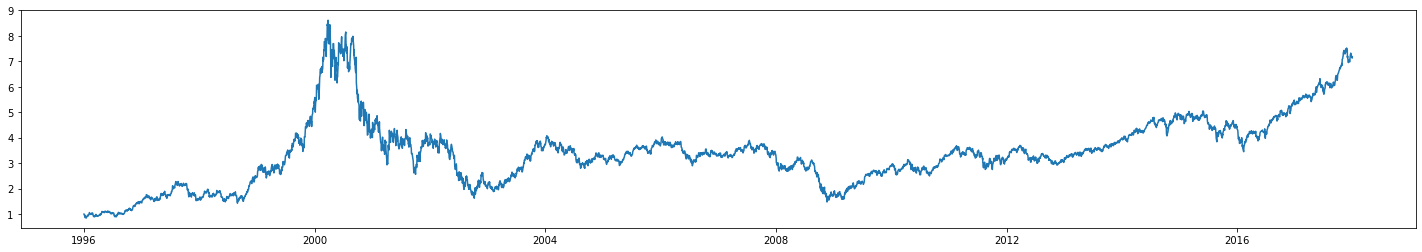

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
plt.plot(mar_cap['date'], mar_cap['semi index'])
plt.show()

In [50]:
mar_cap

,date,semi index
0,1996-01-02,1.000000
1,1996-01-03,0.968067
2,1996-01-04,0.967984
3,1996-01-05,0.964280
4,1996-01-08,0.958427
...,...,...
5534,2017-12-22,7.233438
5535,2017-12-26,7.169186
5536,2017-12-27,7.189771
5537,2017-12-28,7.199211


In [14]:
firm_num = []
for d in D:
    firm_num.append([d, len(df_date[df_date['date'] == d])])

firm_num = pd.DataFrame(firm_num)
firm_num.columns = ['date', 'firm number']
firm_num['date'] = pd.to_datetime([str(date)[:4]+'-'+str(date)[4:6]+'-'+str(date)[6:] for date in firm_num['date']])

In [26]:
set(df_date[df_date['date'] == 20110524]['CUSIP'])-set(df_date[df_date['date'] == 20110525]['CUSIP'])  # 04743P10, Qualcomm Atheros Inc
set(df_date[df_date['date'] == 20110526]['CUSIP'])-set(df_date[df_date['date'] == 20110525]['CUSIP'])  # G3727Q10, Freescale Semiconductor Ltd


set()

# TEST #

In [20]:
b11 = pd.read_csv('C:\\Users\\User\\Desktop\\資料整理\\input\\meanSV_b11.csv')
b21 = pd.read_csv('C:\\Users\\User\\Desktop\\資料整理\\input\\meanSV_b21.csv')

In [67]:
b11.head()

,date,skew,vol
0,1996-02-05,0.044730,0.220429
1,1996-03-04,0.030961,0.311313
2,1996-04-08,0.037552,0.268198
3,1996-05-06,0.035517,0.257000
4,1996-06-10,0.019195,0.289212


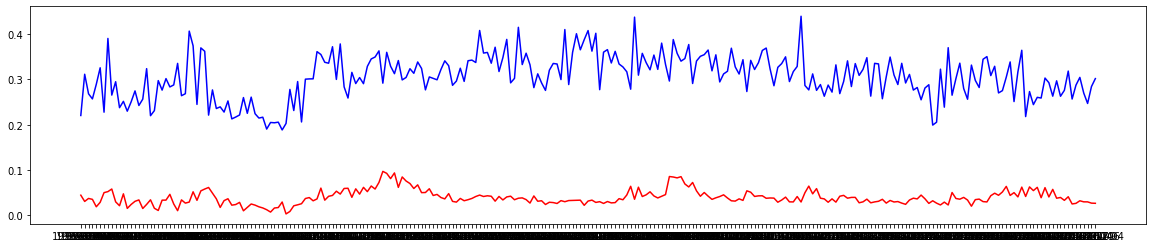

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
plt.plot(b11['date'], b11['skew'], color='r', label='skew_11')


plt.plot(b11['date'], b11['vol'], color='b', label='vol_11')
plt.show()

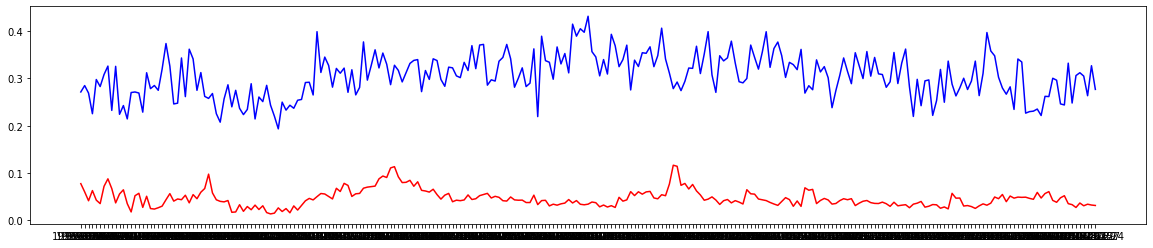

In [74]:
plt.figure(figsize=(20,4))
plt.plot(b21['date'], b21['skew'], color='r', label='skew_21')


plt.plot(b21['date'], b21['vol'], color='b', label='vol_21')
plt.show()

In [2]:
pip install holidays

  Created wheel for holidays: filename=holidays-0.10.5.2-cp37-none-any.whl size=126819 sha256=c9989359ab03eb5b79af44e075c133cc4e2422704b1a1811f8fdc93cbf92bbd3
  Stored in directory: C:\Users\User\AppData\Local\pip\Cache\wheels\e7\62\d6\f5bee2a6cc5427fdec38dd2bea41d3703d543ab42f0197e9b1
  Created wheel for pymeeus: filename=PyMeeus-0.5.6-cp37-none-any.whl size=725264 sha256=0bd33e0c36cc48339c725dbfe8eb8eff6e3b1c03f1d536d536b7e5bb3ef652e6
  Stored in directory: C:\Users\User\AppData\Local\pip\Cache\wheels\d5\6e\17\d40f6dec3a584e2b7541385a27e9b3397e20c019014f765688
Successfully built holidays pymeeus
Note: you may need to restart the kernel to use updated packages.


In [3]:
from datetime import date
import holidays

In [6]:
# https://www.cnpython.com/qa/52368
# Select country
us_holidays = holidays.US()

# Print all the holidays in US in year 2018
for ptr in holidays.US(years = 2021).items():
    print(ptr)

(datetime.date(2021, 1, 1), "New Year's Day")
(datetime.date(2021, 12, 31), "New Year's Day (Observed)")
(datetime.date(2021, 1, 18), 'Martin Luther King Jr. Day')
(datetime.date(2021, 2, 15), "Washington's Birthday")
(datetime.date(2021, 5, 31), 'Memorial Day')
(datetime.date(2021, 7, 4), 'Independence Day')
(datetime.date(2021, 7, 5), 'Independence Day (Observed)')
(datetime.date(2021, 9, 6), 'Labor Day')
(datetime.date(2021, 10, 11), 'Columbus Day')
(datetime.date(2021, 11, 11), 'Veterans Day')
(datetime.date(2021, 11, 25), 'Thanksgiving')
(datetime.date(2021, 12, 25), 'Christmas Day')
(datetime.date(2021, 12, 24), 'Christmas Day (Observed)')


In [8]:
import QuantLib as ql

In [12]:
calendar = ql.UnitedStates()
calendar.isHoliday(ql.Date(1, 1,2021))


True